In [8]:
import xarray as xr
from xgcm import Grid
from matplotlib import pyplot as plt
import pandas as pd
from backgroung import *
import cartopy.crs as ccrs
import warnings
from IPython.core.display import SVG, HTML

In [2]:
model_path = 'http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg'
model = xr.open_dataset(model_path)

In [6]:
model.coords

Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 -0.8833 -0.85 -0.8167 ...
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 -0.9 -0.8667 -0.8333 -0.8 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
    lon_u       (eta_u, xi_u) float64 ...
    lat_u       (eta_u, xi_u) float64 ...
    lon_v       (eta_v, xi_v) float64 ...
    lat_v       (eta_v, xi_v) float64 ...
    lon_psi     (eta_psi, xi_psi) float64 ...
    lat_psi     (eta_psi, xi_psi) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-01T01:00:00 ...

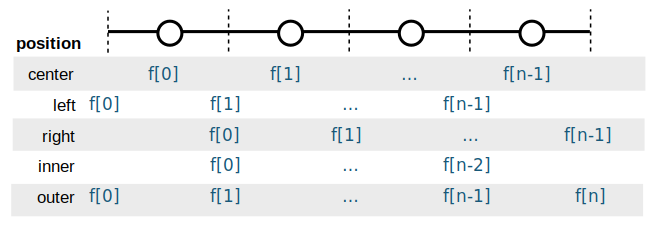

In [10]:
'/Users/vrx/notebooks/xgcm/SVG(filename=axis_positions.svg')

<img src='/Users/vrx/notebooks/xgcm/Whole_grid.png>

In [11]:
rename_dict = {'eta_u':'eta_rho', 'xi_v':'xi_rho'}

def rename_redundant_dim(ds, rename_dict):
    for k,v in rename_dict.items():
        ds_full = ds.copy()
        # remove redundant dims
        drop_vars = [a for a in ds.keys() if k in ds[a].dims]
        ds = ds.drop(drop_vars)
        for d in ds_full.data_vars:
            if k in ds_full[d].dims:
                ds[d] = ds_full[d].rename({k:v})
        for c in ds_full.coords:
            if k in ds_full[c].dims:
                ds.coords[c] = ds_full[c].rename({k:v})
    return ds

model = rename_redundant_dim(model, rename_dict);

/Users/vrx/miniconda3/envs/owl/lib/python3.6/_collections_abc.py:720: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  yield from self._mapping


In [8]:
depths = get_depths(ds, 'rho', 0)

In [9]:
fgb_depths = depths[:,28,306]
fgb_int = (fgb_depths[1:].data + fgb_depths[:-1].data)*.5

In [10]:
salt_diff = salt.diff('s_rho')

In [11]:
temp_dif = temp.diff('s_rho')

In [ ]:
t , d = np.meshgrid(ds['ocean_time'].data, fgb_int)

In [13]:
.dims

('ocean_time', 's_rho')

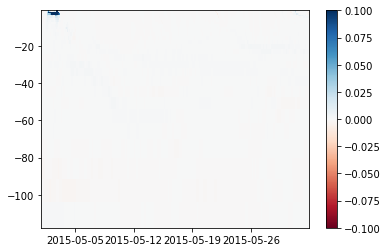

In [22]:
plt.pcolormesh(ds['ocean_time'], fgb_int, (salt_diff/ fgb_depths.diff('srho')).data.T, 
               cmap='RdBu', vmin=-0.1, vmax= 0.1)
plt.colorbar()

In [ ]:
plt.pcolormesh(ds['ocean_time'].data, fgb_int, temp_diff.data.T, 
               cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
#lat_rho=27.89632222, lon_rho=-93.59722222
# lons[0,301:303]
ds.salt[0,-1,29, 301]

In [ ]:
#lat_rho=27.89632222, lon_rho=-93.59722222
print(lons[28,306].data)
lats[28,306].data

In [ ]:
# def read_model(buoy, which, dstart, dend, timing='recent', units='Metric',
#                tz='utc', s_rho=-1):